## OpenPIV tutorial of all test cases

In [1]:
from openpiv import tools, pyprocess, scaling, validation, filters
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext watermark
%watermark -v -m -p numpy,openpiv -g -b

Python implementation: CPython
Python version       : 3.9.6
IPython version      : 7.26.0

numpy  : 1.21.2
openpiv: 0.23.6

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 58 Stepping 9, GenuineIntel
CPU cores   : 8
Architecture: 64bit

Git hash: 473f7283d372260ccadbe2f88d5102d1a86d0d9c

Git branch: master



In [3]:
# set of typical parameters
window_size = 32 # pixels 32 x 32 pixels interrogation window, in frame A.
overlap = 16 # overlap is 8 pixels, i.e. 25% of the window
search_size = 40  # pixels 64 x 64 in frame B, avoids some peak locking for 
                  # large displacements

In [4]:
def openpiv_default_run(im1, im2, window_size, overlap, search_size):
    """ default settings for OpenPIV analysis using
    extended_search_area_piv algorithm for two images
    
    Inputs:
        im1,im2 : str,str = path of two image
    """
    frame_a  = tools.imread(im1)
    frame_b  = tools.imread(im2)

    u, v, sig2noise = pyprocess.extended_search_area_piv(frame_a.astype(np.int32), 
                                                       frame_b.astype(np.int32), 
                                                       window_size=window_size, 
                                                       overlap=overlap, 
                                                       dt=1, 
                                                       search_area_size=search_size, 
                                                       sig2noise_method='peak2mean',
                                                       correlation_method='circular',
                                                       normalized_correlation=True)
    x, y = pyprocess.get_rect_coordinates(frame_a.shape, 
                                     search_size, 
                                     overlap)
    # 5% lowest range
    u, v, mask = validation.sig2noise_val(u, v, 
                                          sig2noise, 
                                          threshold = np.percentile(sig2noise,2.5))
    u, v = filters.replace_outliers( u, v, method='localmean', 
                                    max_iter=3, kernel_size=3)
    x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 1. )

    x, y, u, v = tools.transform_coordinates(x, y, u, v)
    
    tools.save(x, y, u, v, mask, list_of_images[0]+'.txt' )
    fig,ax = plt.subplots(figsize=(8,8))
    
    tools.display_vector_field(list_of_images[0]+'.txt', 
                                        on_img=True,image_name=list_of_images[0],
                                        scaling_factor=1.,
                                        ax=ax)
#     tools.display_vector_field(list_of_images[0]+'.txt', 
#                                         scaling_factor=1.,
#                                         ax=ax[1])

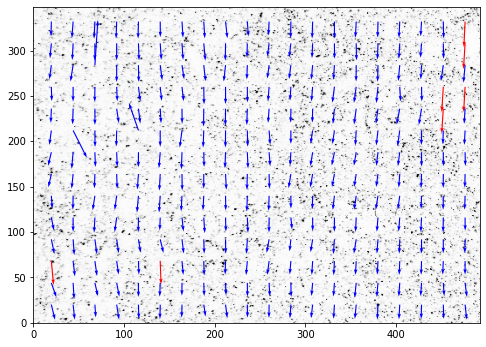

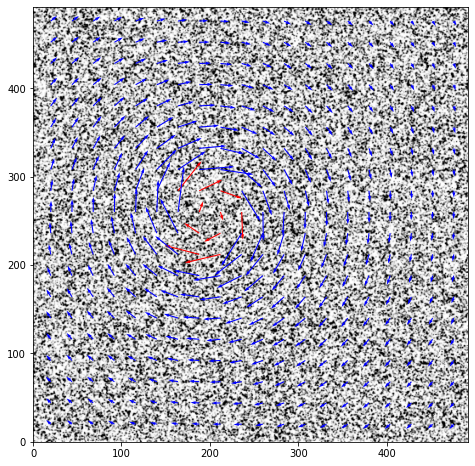

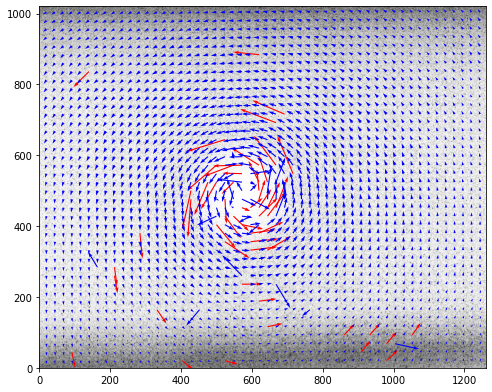

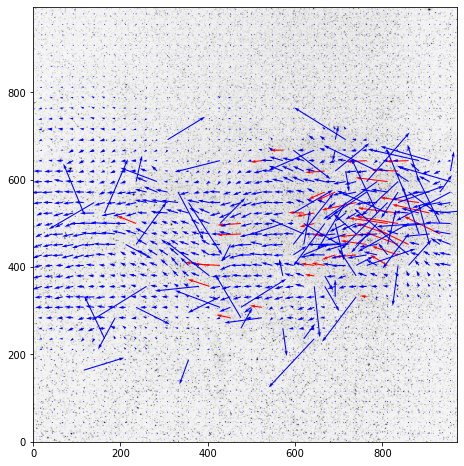

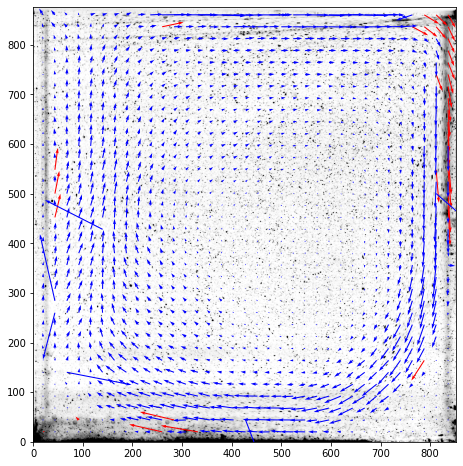

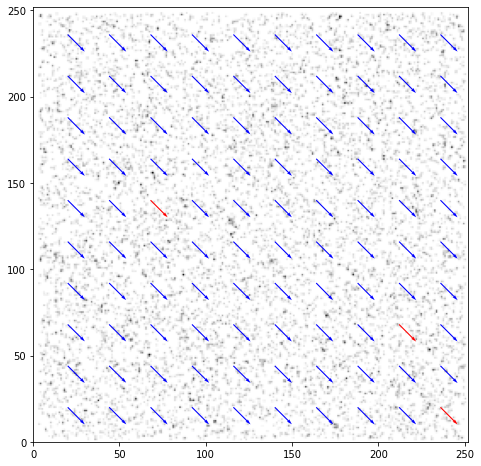

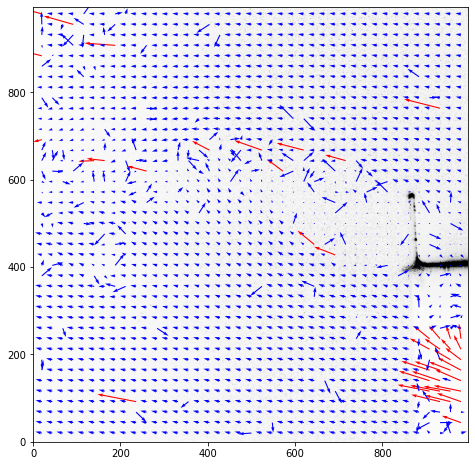

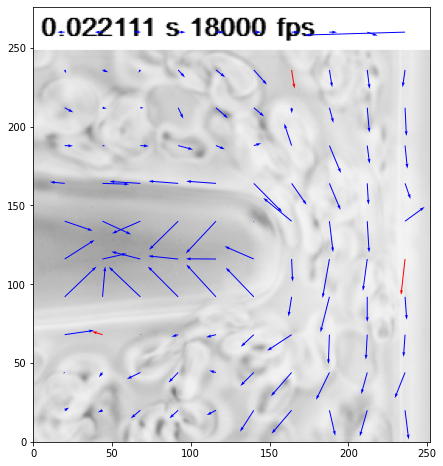

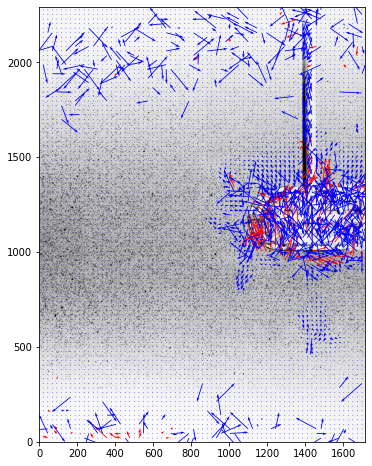

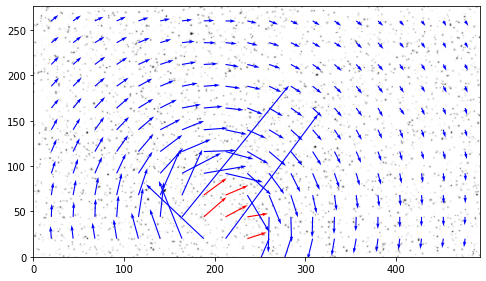

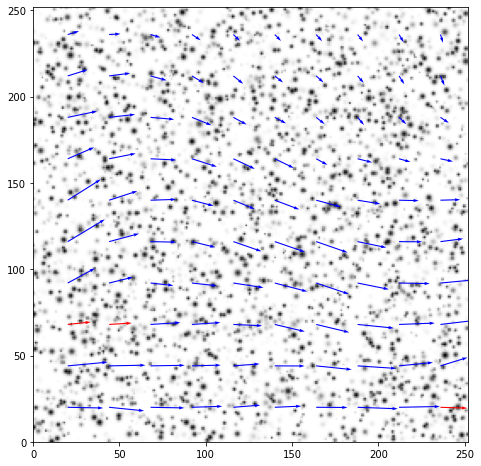

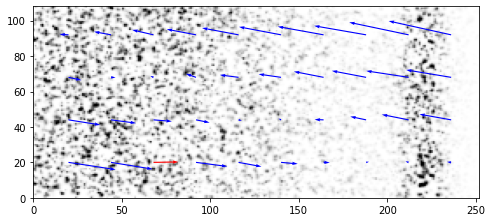

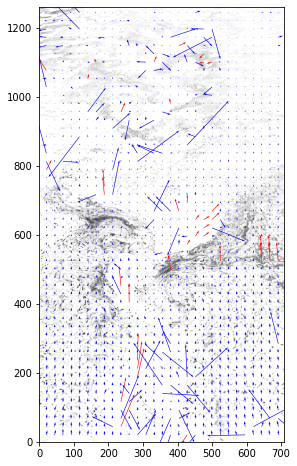

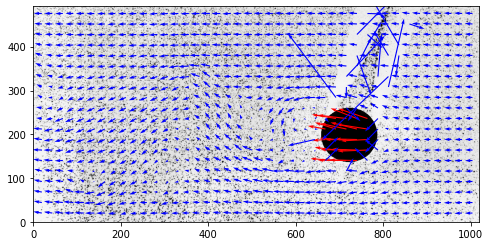

In [5]:
alist_filter = ['jpg','bmp','png','tif','tiff']


# all test cases in /openpiv/examples/
list_of_tests = glob.glob('../test*')
list_of_tests.sort()

list_of_images = []
for test in list_of_tests:
    
    list_of_files = glob.glob(test+'/*.*')
    list_of_files.sort()
    list_of_images = [f for f in list_of_files if f[-3:] in alist_filter]
    if len(list_of_images) > 0:
        openpiv_default_run(list_of_images[0],list_of_images[1],window_size, overlap, search_size)

In [6]:
# set of typical parameters
window_size = [16, 32] # pixels 24 x 32 pixels interrogation window, in frame A.
overlap = [8, 16] # overlap is [12 x 16] , 50%
search_size = 40  # search size is larger than the window size to get also some large displacements

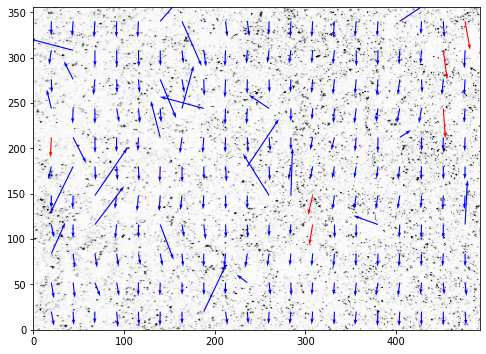

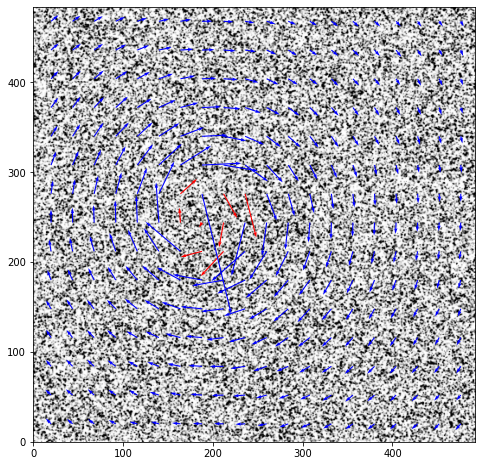

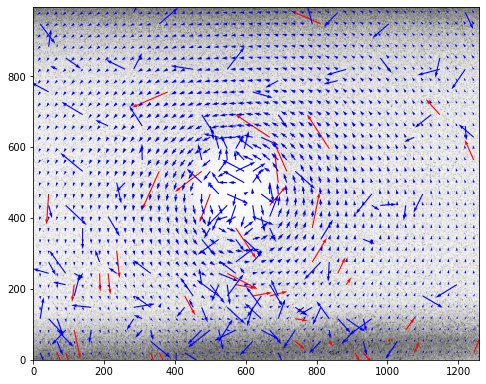

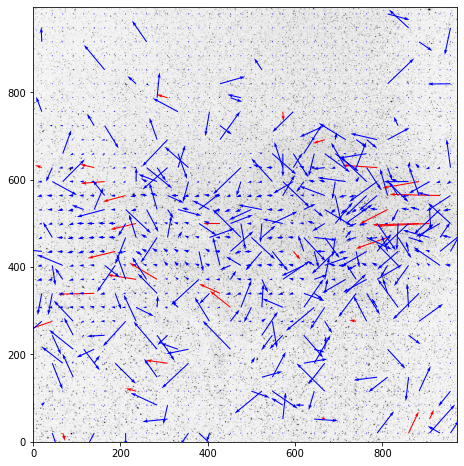

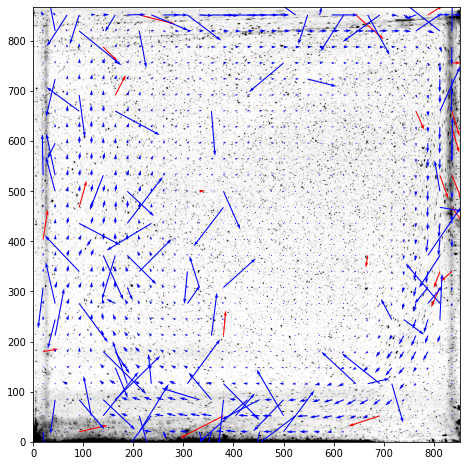

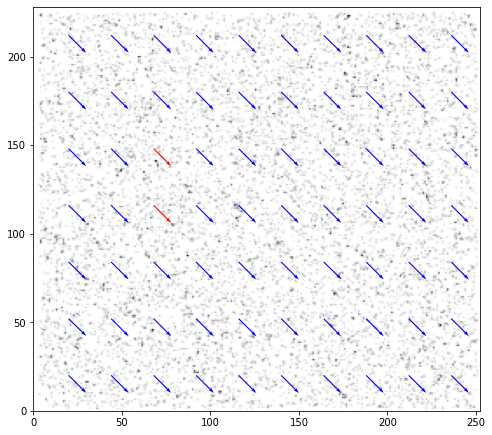

C:\Users\alex\miniconda3\envs\erichzimmer\lib\site-packages\matplotlib\quiver.py:663: RuntimeWarning: Mean of empty slice.
  amean = a.mean()
C:\Users\alex\miniconda3\envs\erichzimmer\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


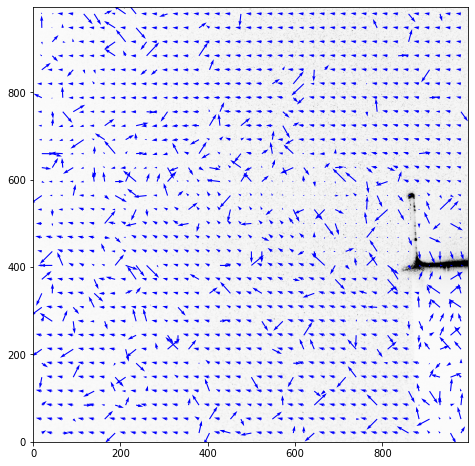

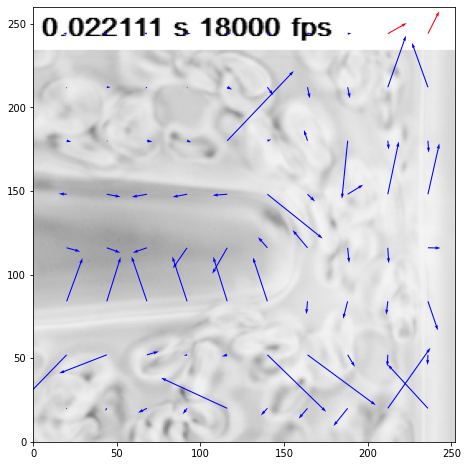

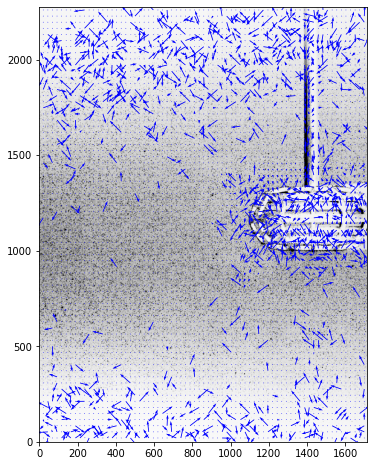

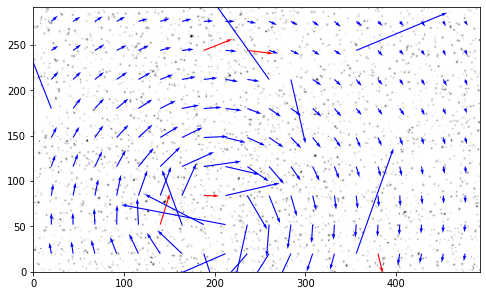

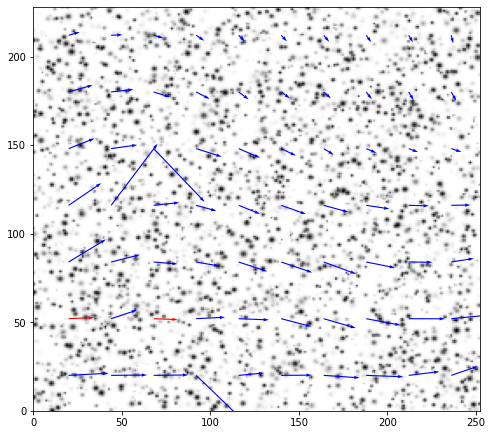

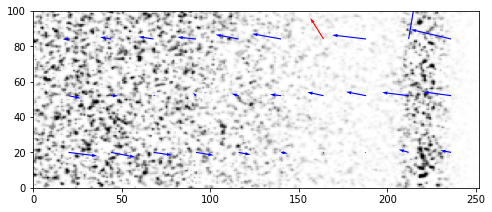

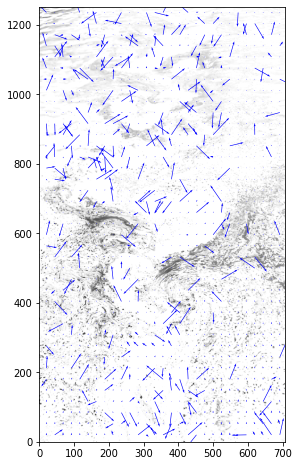

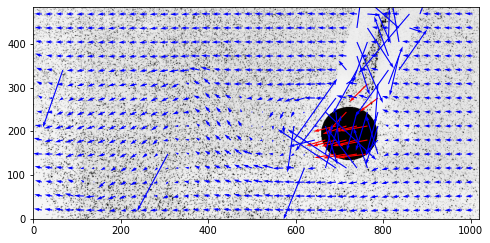

In [7]:
list_of_images = []
for test in list_of_tests:
    
    list_of_files = glob.glob(test+'/*.*')
    list_of_files.sort()
    list_of_images = [f for f in list_of_files if f[-3:] in alist_filter]
    if len(list_of_images) > 0:
        openpiv_default_run(list_of_images[0],list_of_images[1], window_size, overlap, search_size)